<a href="https://colab.research.google.com/github/riponalmamun/Decision_Tree_and_Random_Forest/blob/main/Decision_Tree_and_Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
mushroom = fetch_ucirepo(id=73)

# data (as pandas dataframes)
X = mushroom.data.features
y = mushroom.data.targets

# metadata
print(mushroom.metadata)

# variable information
print(mushroom.variables)

{'uci_id': 73, 'name': 'Mushroom', 'repository_url': 'https://archive.ics.uci.edu/dataset/73/mushroom', 'data_url': 'https://archive.ics.uci.edu/static/public/73/data.csv', 'abstract': 'From Audobon Society Field Guide; mushrooms described in terms of physical characteristics; classification: poisonous or edible', 'area': 'Biology', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 8124, 'num_features': 22, 'feature_types': ['Categorical'], 'demographics': [], 'target_col': ['poisonous'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1981, 'last_updated': 'Thu Aug 10 2023', 'dataset_doi': '10.24432/C5959T', 'creators': [], 'intro_paper': None, 'additional_info': {'summary': "This data set includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family (pp. 500-525).  Each species is identified as definitely edible, definitely po

In [ ]:
# The iris dataset is not loaded, use the previously loaded mushroom data
# X = iris.data  # This line causes the error
# y = iris.target # This line causes the error

# Since X and y are already defined from the mushroom dataset in the previous cell,
# we can directly proceed to train_test_split

# Split the data into 80% train and 20% test
from sklearn.model_selection import train_test_split # import the train_test_split function
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
import numpy as np
import pandas as pd
import zipfile

# Load dataset (The mushroom dataset is a CSV inside a ZIP)
with zipfile.ZipFile('/content/mushroom.zip', 'r') as zip_ref:
    # Extract the 'agaricus-lepiota.data' file
    with zip_ref.open('agaricus-lepiota.data') as file:
        data = pd.read_csv(file, header=None) # Assuming no header row

# ... (rest of the code remains unchanged) ...

In [ ]:
import numpy as np
import pandas as pd

# Preprocessing: Convert categorical features to numerical values
data = data.apply(lambda x: pd.factorize(x)[0])

X = data.drop(columns=[22]).values  # Drop the last column instead of 'class'
y = data.iloc[:, 22].values

# Define functions for decision tree

def entropy(y):
    """Calculate the entropy of label array y."""
    unique_labels, counts = np.unique(y, return_counts=True)
    probabilities = counts / counts.sum()
    return -np.sum(probabilities * np.log2(probabilities))

def info_gain(X_column, y, threshold):
    """Calculate information gain given a feature column, labels, and threshold."""
    left_split = y[X_column <= threshold]
    right_split = y[X_column > threshold]
    if len(left_split) == 0 or len(right_split) == 0:
        return 0
    parent_entropy = entropy(y)
    left_entropy = entropy(left_split)
    right_entropy = entropy(right_split)
    n = len(y)
    weighted_avg = (len(left_split) / n) * left_entropy + (len(right_split) / n) * right_entropy
    return parent_entropy - weighted_avg

def best_split(X, y):
    """Find the best split for the data."""
    best_gain = 0
    best_feature, best_threshold = None, None
    for feature_index in range(X.shape[1]):
        X_column = X[:, feature_index]
        thresholds = np.unique(X_column)
        for threshold in thresholds:
            gain = info_gain(X_column, y, threshold)
            if gain > best_gain:
                best_gain = gain
                best_feature = feature_index
                best_threshold = threshold
    return best_feature, best_threshold

class DecisionTree:
    def __init__(self, min_samples_split=2, max_depth=10):
        self.min_samples_split = min_samples_split
        self.max_depth = max_depth
        self.tree = None

    def fit(self, X, y):
        """Build the decision tree."""
        self.tree = self._grow_tree(X, y)

    def _grow_tree(self, X, y, depth=0):
        n_samples, n_features = X.shape
        n_labels = len(np.unique(y))

        if depth >= self.max_depth or n_labels == 1 or n_samples < self.min_samples_split:
            leaf_value = self._most_common_label(y)
            return leaf_value

        feature_index, threshold = best_split(X, y)
        if feature_index is None:
            return self._most_common_label(y)

        left_idxs, right_idxs = X[:, feature_index] <= threshold, X[:, feature_index] > threshold
        left = self._grow_tree(X[left_idxs], y[left_idxs], depth + 1)
        right = self._grow_tree(X[right_idxs], y[right_idxs], depth + 1)
        return (feature_index, threshold, left, right)

    def _most_common_label(self, y):
        return np.bincount(y).argmax()

    def predict(self, X):
        """Predict class for X."""
        return [self._predict(inputs) for inputs in X]

    def _predict(self, inputs):
        node = self.tree
        while isinstance(node, tuple):
            feature_index, threshold, left, right = node
            if inputs[feature_index] <= threshold:
                node = left
            else:
                node = right
        return node

# Train and test the decision tree
tree = DecisionTree(max_depth=5)
tree.fit(X, y)
predictions = tree.predict(X)

# Accuracy
accuracy = np.mean(predictions == y)
print(f"Training accuracy: {accuracy:.2f}")


Training accuracy: 0.66


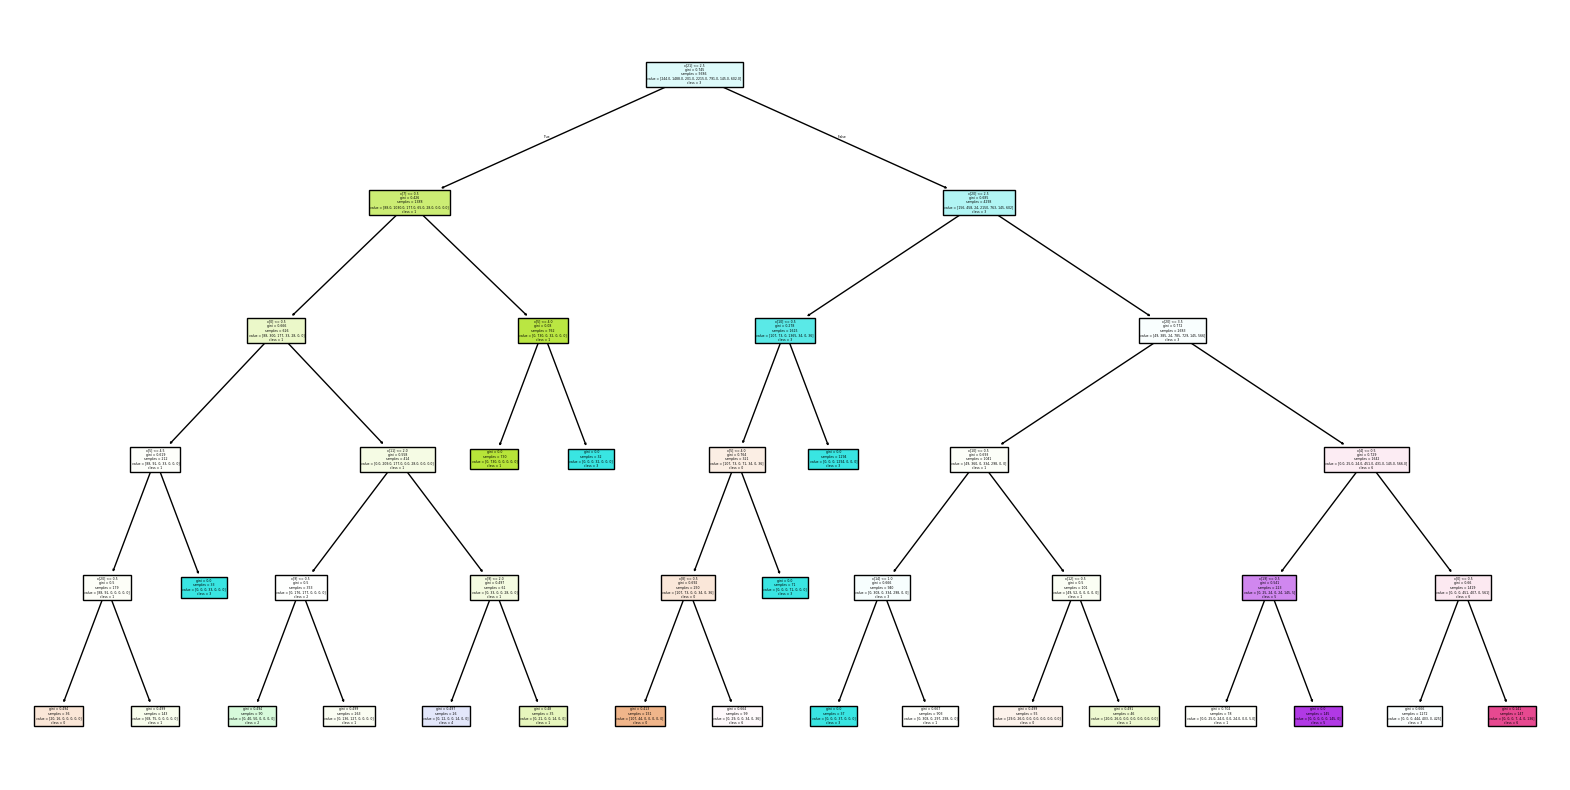

In [ ]:
# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree # Import the DecisionTreeClassifier and plot_tree
import matplotlib.pyplot as plt # Import the plotting library


# Train the Decision Tree classifier
clf = DecisionTreeClassifier(max_depth=5, random_state=42)
clf.fit(X_train, y_train)

# Plot the Decision Tree
plt.figure(figsize=(20,10))

# Get feature names (If available)
feature_names = X.columns if hasattr(X, 'columns') else None

# Get the unique class labels from your target variable (y)
class_names = [str(i) for i in np.unique(y)] # Adjust if you have specific class names

# Pass these unique class names to the plot_tree function
plot_tree(clf, feature_names=feature_names, class_names=class_names, filled=True)
plt.show()